In [134]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [140]:
usage = pd.read_excel('./Data/usage.xlsx', index_col=0)
usage.head()

,1,2,3,4,5,6,7,8,9,10,...,242,243,244,245,246,247,248,249,250,251
Part Number,,,,,,,,,,,,,,,,,,,,,
4474-954261,0,0,0,2000,0,0,100,0,0,0,...,0,92,18,0,0,0,0,0,0,0
2907-805034,0,0,7000,0,0,0,0,0,0,0,...,0,4000,1500,0,0,120,0,0,0,0
4238-795393,0,0,2000,6000,20000,0,200,0,0,0,...,7300,0,60,3100,750,320,2250,2000,0,0
9771-424291,0,0,0,4000,20000,0,100,0,250,0,...,617,1709,1381,2400,0,300,0,0,0,100
6067-292422,40,0,0,2000,0,1000,0,0,290,0,...,7000,4000,0,3000,750,20,2250,2000,200,0


In [141]:
part = 22

part_history = np.array(usage.iloc[part,:])

Text(0.5, 1.0, 'Historical Usage')

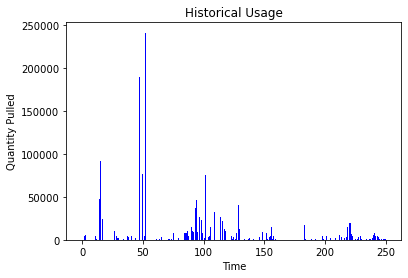

In [142]:
## Visualize the history

time = [i for i in range(len(part_history))]

plt.bar(time, part_history, color='blue')
plt.xlabel("Time")
plt.ylabel("Quantity Pulled")
plt.title("Historical Usage")

In [152]:
## Only Grab last 24 months 
# Don't want regime changes if possible
usage = usage.iloc[:,len(part_history)-24:]


In [153]:
## Find means and variances

usage['mean'] = usage.mean(numeric_only=True, axis=1)
usage['std'] = usage.std(numeric_only=True, axis=1)

usage.head()

,228,229,230,231,232,233,234,235,236,237,...,244,245,246,247,248,249,250,251,mean,std
Part Number,,,,,,,,,,,,,,,,,,,,,
4474-954261,0,0,0,0,0,0,0,0,0,0,...,18,0,0,0,0,0,0,0,4.583333,18.578475
2907-805034,0,0,4000,250,0,0,0,100,0,600,...,1500,0,0,120,0,0,0,0,740.416667,1358.303105
4238-795393,0,200,1000,1500,0,0,0,200,1000,300,...,60,3100,750,320,2250,2000,0,0,1286.458333,1920.149994
9771-424291,0,0,0,0,500,0,0,1000,0,700,...,1381,2400,0,300,0,0,0,100,435.708333,639.492929
6067-292422,0,1600,3000,0,0,0,0,200,0,0,...,0,3000,750,20,2250,2000,200,0,1196.666667,1678.133057


In [154]:
# Calculate Coefficient of Variation

usage['CoV'] = usage['std'] / usage['mean']

usage.sort_values('CoV', inplace=True)

usage.head()

,228,229,230,231,232,233,234,235,236,237,...,245,246,247,248,249,250,251,mean,std,CoV
Part Number,,,,,,,,,,,,,,,,,,,,,
8490-896845,500,3000,5000,2250,2000,0,0,500,1000,2000,...,3500,0,0,2000,3000,0,500,2014.583333,1862.428923,0.924474
3017-534841,100,400,4000,1750,250,0,300,800,200,500,...,3500,250,0,3000,2500,0,400,1697.916667,1706.206756,1.004883
9085-142304,0,800,4000,0,750,0,0,1300,0,1500,...,100,750,0,2250,2000,0,0,1422.916667,1576.056469,1.107624
7084-233916,0,200,4000,1500,500,0,0,2000,400,200,...,2500,500,0,2250,2000,200,900,1469.041667,1628.220744,1.108356
6756-799349,400,3000,5000,500,0,325,0,900,0,200,...,3500,500,0,1250,1000,500,700,1872.291667,2136.579226,1.141157


In [155]:
# Run an accumulating CoV

usage['accumulating_CoV'] = usage['CoV'].cumsum()

In [ ]:
#

In [157]:
## Categorize into X, Y, or Z

def categorize(x):
    if x <= 20:
        return 'X'
    elif x <= 95:
        return 'Y'
    else:
        return 'Z'

usage['category'] = usage.accumulating_CoV.apply(categorize)
usage

,228,229,230,231,232,233,234,235,236,237,...,247,248,249,250,251,mean,std,CoV,accumulating_CoV,category
Part Number,,,,,,,,,,,,,,,,,,,,,
8490-896845,500,3000,5000,2250,2000,0,0,500,1000,2000,...,0,2000,3000,0,500,2014.583333,1862.428923,0.924474,0.924474,X
3017-534841,100,400,4000,1750,250,0,300,800,200,500,...,0,3000,2500,0,400,1697.916667,1706.206756,1.004883,1.929356,X
9085-142304,0,800,4000,0,750,0,0,1300,0,1500,...,0,2250,2000,0,0,1422.916667,1576.056469,1.107624,3.036980,X
7084-233916,0,200,4000,1500,500,0,0,2000,400,200,...,0,2250,2000,200,900,1469.041667,1628.220744,1.108356,4.145336,X
6756-799349,400,3000,5000,500,0,325,0,900,0,200,...,0,1250,1000,500,700,1872.291667,2136.579226,1.141157,5.286493,X
2572-75719,600,1800,9000,0,1000,0,0,1400,200,1700,...,0,2000,3000,0,700,2165.625000,2514.621953,1.161153,6.447646,X
2018-83304,400,1200,7000,2500,1500,0,0,400,0,2800,...,0,1500,1000,200,400,1607.291667,1869.345351,1.163041,7.610686,X
4426-435883,500,1600,6000,3000,1500,0,0,0,100,1100,...,0,2250,2000,0,1900,2058.333333,2450.538490,1.190545,8.801231,X
7065-979082,0,2200,12000,1500,1500,400,0,0,0,0,...,440,4500,4500,0,1800,2843.333333,3410.550624,1.199490,10.000722,X
